In [1]:
# import the necessary packages
from transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
from matplotlib import pyplot as plt

In [2]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required = True,
#	help = "Path to the image to be scanned")
#args = vars(ap.parse_args())


In [3]:
# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread("images/alhdo.jpg")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)

In [74]:
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
#  Use Canny algorithm to detect edge
edged = cv2.Canny(gray, 20, 200)

STEP 1: Edge Detection


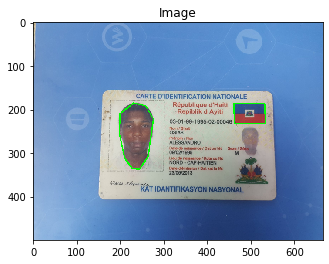

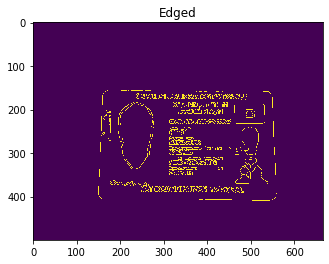

In [75]:
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
img = image[:,:,::-1]
plt.imshow(img)
plt.title('Image')
plt.show()
plt.imshow(edged)
plt.title('Edged')
plt.show()

In [78]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)

In [80]:
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.1 * peri, True)
    print(peri)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    #if len(approx) == 4:
    #    screenCnt = approx
    #    break
     

224.3847759962082
222.87005698680878
332.066015124321
79.31370830535889
76.97056233882904
125.88224947452545
160.08326029777527
117.39696848392487
239.5807341337204
95.63960909843445
92.5269113779068
102.91168701648712
92.97056245803833
508.7178167104721
140.56854152679443
103.35533845424652
385.01933217048645
111.98275518417358
70.28427064418793
76.04163014888763
50.72792184352875
62.870057225227356
209.53910386562347
60.52691113948822
77.94112491607666
1087.3595131635666
755.2691130638123
94.76955199241638
403.3208484649658
83.11269783973694
52.28427052497864
35.55634891986847
314.69343185424805
146.3675309419632
49.35533857345581
43.21320307254791
33.65685415267944
194.71067690849304
57.21320307254791
36.14213538169861
31.313708305358887
44.284270882606506
204.08326029777527
33.31370830535889
111.25483322143555
78.28427076339722
34.38477599620819
30.97056245803833
31.899494767189026
323.8061293363571
30.727921843528748
32.38477599620819
50.97056245803833
28.727921843528748
350.63455

STEP 2: Find contours of paper


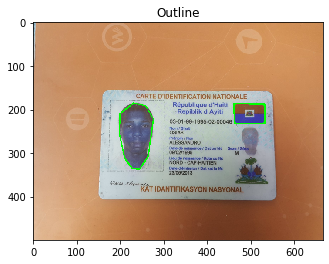

In [82]:
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [cnts[0]], -1, (0, 255, 0), 2)
plt.imshow(image)
plt.title("Outline")
plt.show()

STEP 3: Apply perspective transform


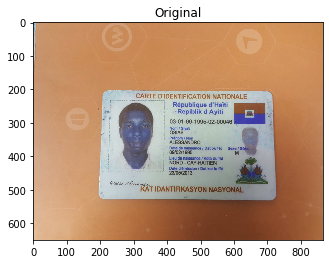

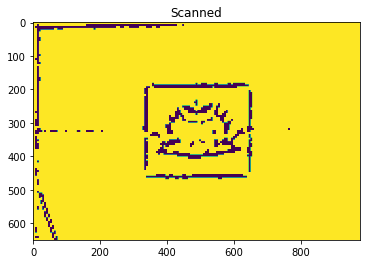

In [20]:
# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255

# show the original and scanned images
print("STEP 3: Apply perspective transform")
plt.imshow(imutils.resize(orig, height = 650))
plt.title("Original")
plt.show()
plt.imshow(imutils.resize(warped, height = 650))
plt.title("Scanned")
plt.show()
